# Australia Vehicules Prices Prediction. 

Dataset from Kaggle: 'https://www.kaggle.com/datasets/nelgiriyewithana/australian-vehicle-prices'

Goals:
* Apply Data Analsys and Data Cleaning fundamentals by criteria.
* Develop a model that finds the best approximation of the prices of a vehicle.
* Understand the importance of Data Cleaning and the changes that can provoke in results.

## Description

Libraries import

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

Dataset import, for information about Dataset consult in Kaggle link. 

In [58]:
df = pd.read_csv("Australian Vehicle Prices.csv")

In [59]:
df.head(5)

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


### Informacion del dataset:

This dataset contains the latest information on car prices in Australia for the year 2023. It covers various brands, models, types, and features of cars sold in the Australian market. It provides useful insights into the trends and factors influencing the car prices in Australia. The dataset includes information such as brand, year, model, car/suv, title, used/new, transmission, engine, drive type, fuel type, fuel consumption, kilometres, colour (exterior/interior), location, cylinders in engine, body type, doors, seats, and price. The dataset has over 16,000 records of car listings from various online platforms in Australia.

### Features:

* Brand: Name of the car manufacturer

* Year: Year of manufacture or release

* Model: Name or code of the car model

* Car/Suv: Type of the car (car or suv)

* Title: Title or description of the car

* UsedOrNew: Condition of the car (used or new)

* Transmission: Type of transmission (manual or automatic)

* Engine: Engine capacity or power (in litres or kilowatts)

* DriveType: Type of drive (front-wheel, rear-wheel, or all-wheel)

* FuelType: Type of fuel (petrol, diesel, hybrid, or electric)

* FuelConsumption: Fuel consumption rate (in litres per 100 km)

* Kilometres: Distance travelled by the car (in kilometres)

* ColourExtInt: Colour of the car (exterior and interior)

* Location: Location of the car (city and state)

* CylindersinEngine: Number of cylinders in the engine

* BodyType: Shape or style of the car body (sedan, hatchback, coupe, etc.)

* Doors: Number of doors in the car

* Seats: Number of seats in the car

* Price: Price of the car (in Australian dollars)

## First Analysis

In [60]:
print("Dimension of Dataset: ",df.shape)

Dimension of Dataset:  (16734, 19)


In [61]:
print("Columns: " ,df.columns.values)

Columns:  ['Brand' 'Year' 'Model' 'Car/Suv' 'Title' 'UsedOrNew' 'Transmission'
 'Engine' 'DriveType' 'FuelType' 'FuelConsumption' 'Kilometres'
 'ColourExtInt' 'Location' 'CylindersinEngine' 'BodyType' 'Doors' 'Seats'
 'Price']


In [62]:
print("NaN verification by column:")
print(df.isna().sum())

NaN verification by column:
Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
ColourExtInt            1
Location              450
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64


Can see there are many NaN in different columns. 
I will analyze each case trying to find the best way to solve the problem, with the goal of saving as much data as possible.

In [63]:
# Check if any row is completely in NaN:
df.loc[(df['Car/Suv'].isna()) & (df['Model'].isna())]

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
2391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The row 2391 if filled with NaN, This line will be deleted.

In [64]:
df.drop([2391], axis=0, inplace=True)

In [65]:
# NaN check again:
print(df.isna().sum())

Brand                   0
Year                    0
Model                   0
Car/Suv                27
Title                   0
UsedOrNew               0
Transmission            0
Engine                  0
DriveType               0
FuelType                0
FuelConsumption         0
Kilometres              0
ColourExtInt            0
Location              449
CylindersinEngine       0
BodyType              281
Doors                1603
Seats                1704
Price                   2
dtype: int64


Seeing the columns, I have the hypotesis that there are any relations between Car/Suv and BodyType.

### Car/Suv Analysis

In [66]:
#Category Car/Suv
print(df["Car/Suv"].value_counts())

Car/Suv
SUV                             5921
Hatchback                       2365
Ute / Tray                      2068
Sedan                           1898
Wagon                            577
                                ... 
Werribee Hyundai                   1
Bay City Holden Used.              1
Auto Mega Warehouse Brisbane       1
Consign-A-Car P/L (Kedron)         1
Australian Vehicle Locators        1
Name: count, Length: 618, dtype: int64


There are 618 different values in Car/Suv, while this columns should only say if the vehicle is a SUV or not. 

This columns will be deleted

In [67]:
df = df.drop("Car/Suv",axis=1)

### BodyType Analysis

The categories in Bodytype are: 10 

Count by category: 
BodyType
SUV             6907
Hatchback       2697
Ute / Tray      2512
Sedan           1983
Wagon           1232
Commercial       610
Coupe            336
Convertible      131
Other             23
People Mover      21
Name: count, dtype: int64

% per category: 
BodyType
SUV             41.277715
Hatchback       16.117851
Ute / Tray      15.012251
Sedan           11.850834
Wagon            7.362696
Commercial       3.645491
Coupe            2.008008
Convertible      0.782884
Other            0.137453
People Mover     0.125501
Name: count, dtype: float64

Count of NaN: 281

% of NaN in BodyType: 1.68



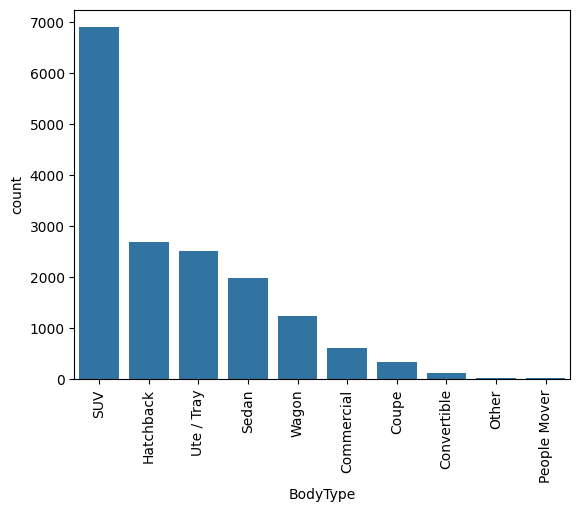

In [68]:
# Categories in BodyType:
cant_bodytype = df['BodyType'].nunique()
print(f"The categories in Bodytype are: {cant_bodytype} \n")
print(f"Count by category: \n{df['BodyType'].value_counts()}\n")
print(f"% per category: \n{df['BodyType'].value_counts() / len(df) *100}\n")
# Cantidad de NaN:
cant_nan_BodyType = df["BodyType"].isna().sum()
print (f"Count of NaN: {cant_nan_BodyType}\n")
#Porcentaje de valores Nan:
perc_nan_BodyType = df["BodyType"].isna().mean()*100
print (f"% of NaN in BodyType: {round(perc_nan_BodyType,2)}\n")
# Grafico BodyType
ax = sns.countplot(df, x="BodyType" , order= df["BodyType"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [69]:
print(f"The NaN of BodyType are {cant_nan_BodyType}, represents {round(perc_nan_BodyType,2)}% of the data. The NaN will be dropped. Hipothesis: The BodyType of the vehicle is a very important factor in the price.")

The NaN of BodyType are 281, represents 1.68% of the data. The NaN will be dropped. Hipothesis: The BodyType of the vehicle is a very important factor in the price.


In [70]:
df = df.dropna(subset=["BodyType"])
print(df.isna().sum())

Brand                   0
Year                    0
Model                   0
Title                   0
UsedOrNew               0
Transmission            0
Engine                  0
DriveType               0
FuelType                0
FuelConsumption         0
Kilometres              0
ColourExtInt            0
Location              449
CylindersinEngine       0
BodyType                0
Doors                1322
Seats                1423
Price                   2
dtype: int64


### Location Analysis

There are 449 NaNs in Location.

Is hard to find a relationship between Location and Price.  Considering that the taxes in the states of Australia are similar,I could suppose that shouldn't be any big relationship with the price.  

For this reason, Location will be dropped. 

In [71]:
location = df["Location"].value_counts()
print(location)

Location
Minchinbury, NSW         540
Blacktown, NSW           287
Liverpool, NSW           254
Hoppers Crossing, VIC    224
Ringwood, VIC            214
                        ... 
Thornlands, QLD            1
Murarrie, QLD              1
Huntingdale, VIC           1
Lyndhurst, VIC             1
East Toowoomba, QLD        1
Name: count, Length: 617, dtype: int64


In [72]:
df.drop(['Location'], axis=1 , inplace=True)
df.columns

Index(['Brand', 'Year', 'Model', 'Title', 'UsedOrNew', 'Transmission',
       'Engine', 'DriveType', 'FuelType', 'FuelConsumption', 'Kilometres',
       'ColourExtInt', 'CylindersinEngine', 'BodyType', 'Doors', 'Seats',
       'Price'],
      dtype='object')

### Doors Analysis

In [73]:
# NaN = 1322 --- 7.9% del tot.
df["Doors"].value_counts()

Doors
 4 Doors     11191
 5 Doors      2533
 2 Doors      1122
 3 Doors       213
 5 Seats        22
 2 Seats        10
 6 Seats         9
 7 Seats         8
 8 Seats         8
 3 Seats         6
 9 Seats         4
 4 Seats         3
 12 Seats        1
Name: count, dtype: int64

There is the word "Door" en every line. 

Some lines have the data of Seats instead of Doors. 

In [74]:
# Delete word "Door".
df["Doors"] = df["Doors"].str.replace(" Doors","")
df["Doors"] = df["Doors"].str.replace(" ","")
# Replace "Seats" for NaN:
df.loc[df['Doors'].str.contains("Seats", na=False), 'Doors'] = np.nan
print(df["Doors"].value_counts(),"\n\n")
print(f"The NaN are : {df['Doors'].isna().sum()}")
# Paso valores a int
df['Doors'] = pd.to_numeric(df['Doors'], errors='coerce')
#df["Doors"].loc[df['Doors'].notna()].astype(int)

Doors
4    11191
5     2533
2     1122
3      213
Name: count, dtype: int64 


The NaN are : 1393


Hipothesis:

The NaN will be replaced for the same amount of Doors of any car that has the same model name.

I consider that there are few models that depend the specific version change the number of doors.

In [75]:
DoorsDict = df[['Doors','Model']].groupby('Model')['Doors'].mean()
DoorsDict = DoorsDict.to_dict()
df['Doors2'] = df.apply(lambda row: DoorsDict[row['Model']] if pd.isnull(row['Doors']) else row['Doors'], axis=1)
df['Doors2'].isna().sum()

257

In [77]:
# Model with NaN in doors:
check_seats = df[['Doors','Doors2',"Model","Brand",'Title']]
check_seats.loc[pd.isnull(check_seats['Doors2'])]. sample(10, random_state=42)

,Doors,Doors2,Model,Brand,Title
11491,NaN,NaN,B-Class,Mercedes-Benz,2015 Mercedes-Benz B-Class B200 DCT
13253,NaN,NaN,Land,Toyota,2021 Toyota Land Cruiser WAGON GXL 4.5L T DIES...
4154,NaN,NaN,Rav,Toyota,2013 Toyota Rav 4 GXL AWD
1452,NaN,NaN,I8,BMW,2016 BMW I8 AWD
578,NaN,NaN,C-CLASS,Mercedes-Benz,2011 Mercedes-Benz C-CLASS C204 C350 BlueEFFIC...
469,NaN,NaN,Xc,Volvo,2016 Volvo Xc 90 L Series D5 Inscription Wagon...
14544,NaN,NaN,Land,Toyota,2010 Toyota Land Cruiser Prado KDJ150R GXL Wag...
1113,NaN,NaN,Serena,Nissan,2014 Nissan Serena Highway Star S-Hybrid
6314,NaN,NaN,V240,GWM,2009 GWM V240 K2 Utility Dual Cab 4dr Man 5sp ...
5013,NaN,NaN,M-Class,Mercedes-Benz,2014 Mercedes-Benz M-Class ML250 BlueTEC 7G-Tr...


In [78]:
print(df.loc[df['Model']=="Land"].shape[0])
print(df.loc[df['Model']=="Rav"].shape[0])
print(df.loc[df['Model']=="Xc"].shape[0])
#I can see there are 19 RAVs and 35 Land Cruisers, none of them have the Doors data. All these vehicles has 4 doors.

35
19
15


In [85]:
doors_4 = df['Doors2'].loc[df['Doors2']==4].count()
print('% of vehicles with 4 doors:')
print(doors_4*100/ (df.shape[0]))

% of vehicles with 4 doors:
70.82421590080233


Considering the high percentage of vehicles with 4 doors, I will assing the value of 4 to all the NaN. 

In [88]:
print("Amount of NaN: ",df["Doors2"].isna().sum(),"\n")
df["Doors2"] = df["Doors2"].fillna("4")

df["Doors2"] = df["Doors2"].astype(int)
print(df["Doors2"].value_counts())

Amount of NaN:  0 

Doors2
4    12133
5     2593
2     1212
3      514
Name: count, dtype: int64


In [89]:
df.drop('Doors',axis=1, inplace = True)

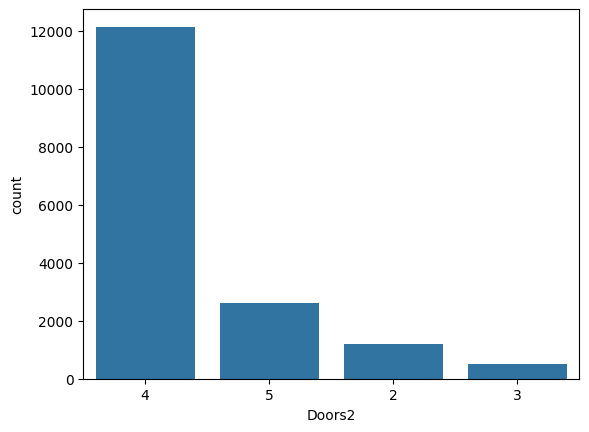

In [91]:
# Grafico Doors
ax = sns.countplot(df, x="Doors2" , order= df["Doors2"].value_counts().index)
plt.show()


### NaN Price

Price is the goal feature. The lines with NaN are dropped.

In [92]:
print(df["Price"])
print(df.Price.isna().sum())
df.dropna(subset = ['Price'], inplace = True)

0         51990
1         19990
2        108988
3         32990
4         34990
          ...  
16728     36770
16729     29500
16731     35280
16732     41888
16733     65888
Name: Price, Length: 16452, dtype: object
2


In [93]:
# Found lines with Price = "POA". Dropped.
print( df[df["Price"]=="POA"].shape[0])
df = df.drop(df[df["Price"]=="POA"].index)
print( df[df["Price"]=="POA"].shape[0])

48
0


In [94]:
df["Price"] = df["Price"].astype(float)

### Seats Analysis

In [95]:
cant_nan_seats = df["Seats"].isna().sum()
print("Number of NaN in Seats:",cant_nan_seats, "\n")
print(df["Seats"].value_counts(),"\n")

# Clean of "Seats" in the line
df["Seats"] = df["Seats"].str.replace(" Seats","")
#df["Seats"] =df["Seats"].astype(int) #lo pasamos a entero
#print(df["Seats"].value_counts() ,"\n")


Number of NaN in Seats: 1409 

Seats
 5 Seats     11285
 7 Seats      1787
 4 Seats       674
 2 Seats       593
 3 Seats       328
 8 Seats       272
 6 Seats        29
 14 Seats       12
 12 Seats        4
 9 Seats         3
 11 Seats        3
 22 Seats        2
 15 Seats        1
Name: count, dtype: int64 



Average of Seats by BodyType

In [96]:
BT_Seats = df[['BodyType', 'Seats']]. dropna()
BT_Seats["Seats"] =BT_Seats["Seats"].astype(int)
BT_Seats = BT_Seats.groupby('BodyType').mean()
BT_Seats.reset_index(inplace=True)
BT_Seats["Seats"] =BT_Seats["Seats"].astype(int)
BT_Seats = BT_Seats.set_index('BodyType')['Seats'].to_dict()
print(BT_Seats)

{'Commercial': 2, 'Convertible': 3, 'Coupe': 3, 'Hatchback': 4, 'Other': 5, 'People Mover': 14, 'SUV': 5, 'Sedan': 4, 'Ute / Tray': 4, 'Wagon': 6}


Fill the NaN with the average by BodyType:

In [97]:
df["Seats2"] = df.apply(lambda row: BT_Seats[row["BodyType"]] if pd.isnull(row['Seats']) else row['Seats'], axis=1)
df["Seats2"] =df["Seats2"].astype(int)

check_seats = df[['Seats','Seats2',"BodyType","Brand"]]
check_seats.loc[pd.isnull(check_seats['Seats'])]

,Seats,Seats2,BodyType,Brand
5,NaN,2,Commercial,Toyota
10,NaN,2,Commercial,Toyota
17,NaN,6,Wagon,Mitsubishi
32,NaN,6,Wagon,Volkswagen
38,NaN,6,Wagon,Jeep
...,...,...,...,...
16706,NaN,2,Commercial,Mercedes-Benz
16708,NaN,6,Wagon,Nissan
16723,NaN,4,Hatchback,Suzuki
16726,NaN,6,Wagon,Toyota


In [98]:
df = df.drop(['Seats'], axis=1)

Analysis of Price by number of Seats

Goal: Detection of Outliers

    Seats2          Price
0        2   50383.762670
1        3   57798.141414
2        4   46582.729730
3        5   34196.590693
4        6   35583.711569
5        7   41328.448797
6        8   38739.323529
7        9   34653.333333
8       11   36316.000000
9       12   72672.500000
10      14   30927.562500
11      15   91537.000000
12      22  149084.000000 



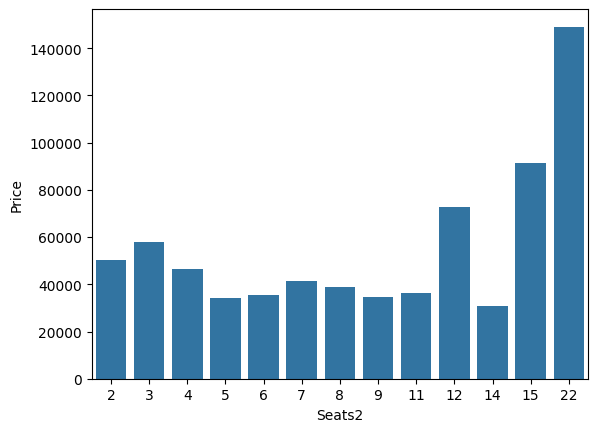

In [100]:
df_seat = df.groupby("Seats2")
df_seat_price = df_seat["Price"].mean().reset_index()
print(df_seat_price,"\n")

plot = sns.barplot( x=df_seat_price["Seats2"], y= df_seat_price["Price"])
plt.show()

It is decided to eliminate the vehicles with: [11 12 14 15 22] Seats2. The most part of vehicles in the dataset are Cars, for that reason the buses of big vehicles will be considered Outliers.

A possible model may associate that the more seats, the more expensive the vehicle is.

                                                   Title  Seats2
54                            2016 Toyota HiAce Commuter      14
1465                          2017 Toyota HiAce Commuter      14
2401                                 2006 Nissan Elgrand      14
5339               1998 Toyota Landcruiser (4X4) 11 Seat      11
6494                          2006 Toyota HiAce Commuter      14
6628               1999 Toyota Landcruiser (4X4) 11 Seat      11
6773               2018 Toyota HiAce Commuter (12 Seats)      12
7564                          2011 Toyota HiAce Commuter      14
8190                          2011 Toyota HiAce Commuter      14
8211               2005 Toyota Landcruiser (4X4) 11 Seat      11
8389                                 2009 Nissan Elgrand      14
8618                                 2008 Nissan Elgrand      14
8936                          2007 Toyota HiAce Commuter      14
10173                         2006 Toyota HiAce Commuter      14
11594                    

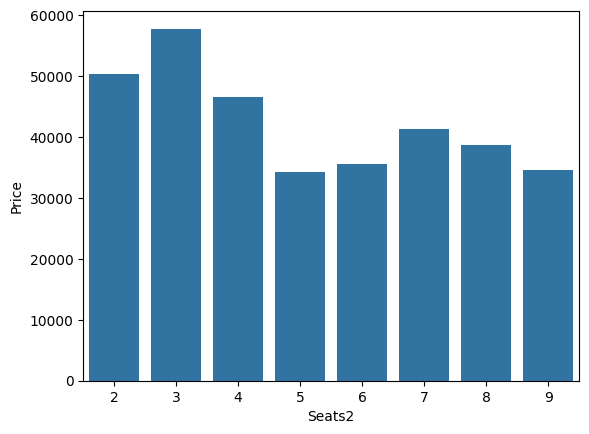

In [101]:
print(df.loc[df["Seats2"] >=11,["Title","Seats2"]])

df = df.drop(df[df["Seats2"] >=11].index)

df_seat = df.groupby("Seats2")
df_seat_price = df_seat["Price"].mean().reset_index()
plot = sns.barplot( x=df_seat_price["Seats2"], y= df_seat_price["Price"])
plt.show()

### Used or New Analysis

In [102]:
df.isna().sum()

Brand                0
Year                 0
Model                0
Title                0
UsedOrNew            0
Transmission         0
Engine               0
DriveType            0
FuelType             0
FuelConsumption      0
Kilometres           0
ColourExtInt         0
CylindersinEngine    0
BodyType             0
Price                0
Doors2               0
Seats2               0
dtype: int64

In [103]:
# Values:
df.UsedOrNew.unique()

array(['DEMO', 'USED', 'NEW'], dtype=object)

Compare the average price between categories to check if there are big differences between USED and DEMO.

In [104]:
df_UsedOrNew = df[['UsedOrNew','Price']]. groupby('UsedOrNew').mean()
df_UsedOrNew

,Price
UsedOrNew,
DEMO,63135.846307
NEW,71604.765957
USED,33692.779456


There are a considerable difference.

Replace str categories by numerical.

In [105]:
stat_dict = {
    'DEMO' : 2,
    'USED' : 1,
    'NEW' : 3
}

status = df.UsedOrNew.replace(stat_dict)
status

0        2
1        1
2        1
3        1
4        1
        ..
16728    1
16729    1
16731    2
16732    1
16733    1
Name: UsedOrNew, Length: 16376, dtype: int64

In [106]:
df['Status'] = status
df.sample(2)

,Brand,Year,Model,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,CylindersinEngine,BodyType,Price,Doors2,Seats2,Status
6970,Renault,2020.0,Koleos,2020 Renault Koleos ZEN X-Tronic (4X2),USED,Automatic,"4 cyl, 2.5 L",Front,Unleaded,8.1 L / 100 km,54660,White / Black,4 cyl,SUV,25990.0,4,5,1
10984,Ford,2005.0,Falcon,2005 Ford Falcon Futura,USED,Automatic,"6 cyl, 4 L",Rear,Unleaded,11.5 L / 100 km,271505,Silver / Grey Cloth,6 cyl,Sedan,5750.0,4,5,1


In [107]:
print(df.UsedOrNew.value_counts())
print(df.Status.value_counts())

UsedOrNew
USED    14700
NEW      1175
DEMO      501
Name: count, dtype: int64
Status
1    14700
3     1175
2      501
Name: count, dtype: int64


In [108]:
df.drop('UsedOrNew', axis = 1, inplace = True)

In [109]:
df.sample()

,Brand,Year,Model,Title,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,CylindersinEngine,BodyType,Price,Doors2,Seats2,Status
6150,Mitsubishi,2019.0,Triton,2019 Mitsubishi Triton 2019 Mitsubishi MR Trit...,Automatic,-,Other,Diesel,-,105769,White / -,-,Ute / Tray,39990.0,3,4,1


### Title Analysis

Check the importance of this column

In [110]:
df.Title.unique()

array(['2022 Ssangyong Rexton Ultimate (awd)',
       '2022 MG MG3 Auto Excite (with Navigation)',
       '2022 BMW 430I M Sport', ..., '2014 Nissan X-Trail TL (4X4)',
       '2014 Toyota Alphard', '2021 Mercedes-Benz C200'], dtype=object)

It is decided drop this column because save the same information that other columns like Brand, Model and Year.

In [111]:
print(df.Title.nunique())

8553


In [112]:
# Se decide eliminar ya que contiene lo mismo que Brand, Model y Year.
df.drop('Title', axis = 1, inplace = True)

### ColourExtInt Analysis

This column does not have relation with the price. Will be dropped.

In [113]:
df.drop('ColourExtInt', axis = 1, inplace = True)

### Engine Analysis

In [114]:
print(f"NaN: {df.Engine.isna ().sum()}")
print(df['Engine'].value_counts())

NaN: 0
Engine
4 cyl, 2 L       3936
4 cyl, 2.5 L     1633
-                1379
4 cyl, 2.4 L      827
6 cyl, 3 L        712
                 ... 
12 cyl, 5.3 L       1
6 cyl, 2.2 L        1
12 cyl, 6.6 L       1
8 cyl, 4.6 L        1
10 cyl, 5.2 L       1
Name: count, Length: 105, dtype: int64


This column has two values, amount of cylinders and volume of the engine. 
Engine will be splited in these two columns.

In [115]:
df[['Engine_Cyl', 'Engine_Vol']] = df['Engine'].str.split(", ", expand=True)
df = df.drop("Engine_Cyl", axis=1)
df = df.drop("Engine", axis=1)

#### Engine_Vol Analysis

In [117]:
df['Engine_Vol'] = df['Engine_Vol'].str.replace(" L","")
print(f"Engine_Vol NaN: {df['Engine_Vol']. isna().sum()}")

Engine_Vol NaN: 1487


Fill NaN with Vol of cars with the same model name.

In [118]:
df['Engine_Vol'] = df['Engine_Vol'].astype("float")
EngineV = df[['Engine_Vol','Model']].groupby('Model')['Engine_Vol'].median()
EngineV = EngineV.to_dict()

In [119]:
df['Engine_Vol2'] = df.apply(lambda row: EngineV[row['Model']] if pd.isnull(row['Engine_Vol']) else row['Engine_Vol'], axis=1)
df['Engine_Vol2'].isna().sum()

377

There are electric cars that there are not Vol. Those cars will have zero value. 

In [120]:
df.loc[df['FuelType'] == 'Electric' ,'Engine_Vol2'] = 0
df['Engine_Vol2'].isna().sum()

305

In [121]:
check_engineV = df[['Engine_Vol','Engine_Vol2',"Model","Brand"]]
check_engineV.loc[pd.isnull(check_engineV['Engine_Vol2'])]. sample(10, random_state=123)

,Engine_Vol,Engine_Vol2,Model,Brand
578,NaN,NaN,C-CLASS,Mercedes-Benz
7704,NaN,NaN,R-Class,Mercedes-Benz
16200,NaN,NaN,Hijet,Daihatsu
16309,NaN,NaN,Fuso,Mitsubishi
3524,NaN,NaN,Xc,Volvo
10238,NaN,NaN,Land,Toyota
16599,NaN,NaN,Voxy,Toyota
731,NaN,NaN,Serena,Nissan
8580,NaN,NaN,Rav,Toyota
8687,NaN,NaN,Land,Toyota


Finally, the vehicles that keep being NaN are dropped

In [122]:
df.dropna(subset = ['Engine_Vol2'], inplace = True)
df['Engine_Vol2'].isna().sum()

0

In [123]:
df.drop('Engine_Vol', axis=1 , inplace=True)
df.columns

Index(['Brand', 'Year', 'Model', 'Transmission', 'DriveType', 'FuelType',
       'FuelConsumption', 'Kilometres', 'CylindersinEngine', 'BodyType',
       'Price', 'Doors2', 'Seats2', 'Status', 'Engine_Vol2'],
      dtype='object')

### Fuel Consumption Analysis

In [124]:
df["FuelConsumption"].value_counts()

FuelConsumption
-                  1094
7.4 L / 100 km      710
7.9 L / 100 km      518
7.3 L / 100 km      475
8.1 L / 100 km      438
                   ... 
20 L / 100 km         1
27 L / 100 km         1
13.3 L / 100 km       1
3.6 L / 100 km        1
15.8 L / 100 km       1
Name: count, Length: 157, dtype: int64

Some lines have "-".

In [125]:
df[df["FuelConsumption"]=="-"].head(10)

,Brand,Year,Model,Transmission,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Price,Doors2,Seats2,Status,Engine_Vol2
5,Toyota,2004.0,Estima,Automatic,Other,Unleaded,-,160230,-,Commercial,9990.0,4,2,1,2.40
10,Toyota,2009.0,HiAce,Automatic,Other,Unleaded,-,148190,-,Commercial,42500.0,3,2,1,2.80
17,Mitsubishi,2013.0,Outlander,Manual,Other,-,-,120020,-,Wagon,13999.0,4,6,1,2.40
32,Volkswagen,2023.0,T-Cross,Automatic,Front,Premium,-,15,-,Wagon,35887.0,4,6,3,1.00
38,Jeep,2012.0,Grand,Automatic,Other,Unleaded,-,224839,-,Wagon,13999.0,3,6,1,3.00
40,Toyota,2009.0,HiAce,Automatic,Rear,Unleaded,-,76259,-,Commercial,32900.0,3,2,1,2.80
78,Peugeot,2015.0,308,Automatic,Other,Unleaded,-,167127,-,Hatchback,12999.0,4,4,1,1.20
98,Toyota,2013.0,HiAce,Automatic,Other,Diesel,-,191173,-,Commercial,30900.0,3,2,1,2.80
116,Dodge,2012.0,Journey,Automatic,Other,Unleaded,-,147589,-,Wagon,10999.0,4,6,1,3.15
121,Toyota,2008.0,HiAce,Automatic,Other,Unleaded,-,112980,-,Commercial,31900.0,3,2,1,2.80


Result: There are vehicles that use Gasoline or Diesel. There are mistakes.

In [126]:
df.FuelConsumption = df.FuelConsumption.str.replace(' L / 100 km','')
df.FuelConsumption.unique()

array(['8.7', '6.7', '6.6', '11', '6', '-', '5.1', '8', '7.1', '4.5',
       '9.8', '6.2', '5.6', '5.4', '7.5', '6.1', '8.4', '5.8', '4.7',
       '7.9', '8.2', '6.9', '8.1', '4.2', '7.7', '9.1', '0', '7.4', '7.6',
       '7.8', '9.9', '9.6', '10', '8.8', '6.4', '8.9', '9', '6.3', '10.4',
       '7.2', '5.5', '14.5', '5.9', '9.3', '11.5', '10.9', '7.3', '9.2',
       '4.8', '10.1', '8.3', '6.5', '8.6', '5.2', '4.9', '8.5', '10.5',
       '10.3', '12.2', '7', '9.5', '16', '9.4', '6.8', '4.6', '11.6',
       '5.3', '9.7', '10.6', '11.8', '10.2', '3.3', '5.7', '10.8', '13.6',
       '10.7', '11.3', '14.6', '13', '4.1', '3.6', '12.1', '17.2', '12.3',
       '12.8', '13.3', '12.7', '13.2', '15.1', '3.9', '5', '14.8', '11.7',
       '16.4', '13.7', '12.6', '11.2', '13.8', '4.4', '11.1', '12.4', '4',
       '12', '3.8', '1.9', '11.4', '13.5', '27', '11.9', '14.4', '13.4',
       '14.9', '20', '15.4', '15.5', '1.7', '12.5', '17', '16.8', '12.9',
       '13.9', '13.1', '15', '17.1', '4.3', '18.

In [129]:
guiones = df[df["FuelConsumption"] =="-"].shape[0]
print(f"Lines with - : {guiones}")

Lines with - : 1094


In [130]:
# Kind of Fuel of vehicles with "-".
df_fc_guion = df [df["FuelConsumption"]=="-"]
print("The types of fuel for vehicles with - are as follows:: \n")
print (df_fc_guion["FuelType"].value_counts() , "\n")

# Vehicles with cosumption = 0
df_fc_cero = df [df["FuelConsumption"]=="0"]
print("The types of fuel for vehicles with consumption = 0 are as follows:: \n")
print (df_fc_cero["FuelType"].value_counts() , "\n")

Los tipos de combustibles de los vehiculos con - son los sig: 

FuelType
Unleaded    437
Diesel      285
-           227
Premium     110
Other        24
Electric     10
LPG           1
Name: count, dtype: int64 

Los tipos de combustibles de los vehiculos con consumo = 0 son los sig: 

FuelType
Diesel      189
Electric    105
Unleaded     56
Premium      14
Leaded        2
Hybrid        1
Name: count, dtype: int64 



Conclusion:
* Cars with "0" consumption will be only electric, the others will be marked "-".
* Cars with "-", their consumption will be replaced by the same value depending on the car model.

In [131]:
# Replace de "0" a "-".
# Replace de Electric, consumo 0.
df.loc[(df["FuelConsumption"]=="0") & (df["FuelType"]!="Electric"),"FuelConsumption"] = "-"
df.loc[df["FuelType"]=="Electric","FuelConsumption"] = 0
print(df[['FuelConsumption','FuelType']][df['FuelType']=="Electric"].value_counts() )


FuelConsumption  FuelType
0                Electric    115
Name: count, dtype: int64


In [132]:
df['FuelConsumption'][df['FuelConsumption'] == "-"].shape[0]

1346

In [133]:
# Dict, Model_Cons :
df['FuelConsumption'] = df['FuelConsumption'].replace("-", np.nan)
df['FuelConsumption'] = df['FuelConsumption'].astype(float)
Model_Cons = df[['Model','FuelConsumption']].groupby('Model')['FuelConsumption'].median()
Model_Cons = Model_Cons.to_dict()

df['FuelConsumption2'] = df.apply(lambda row: Model_Cons[row['Model']] if pd.isnull(row['FuelConsumption']) else row['FuelConsumption'], axis=1)
print(df['FuelConsumption2'].isna().sum())

305


In [134]:
# Fill NaN with average by BodyType:
BT_Cons = df[['BodyType','FuelConsumption2']].groupby('BodyType')['FuelConsumption2'].median()
BT_Cons = BT_Cons.to_dict()

df['FuelConsumption2'] = df.apply(lambda row: BT_Cons[row['BodyType']] if pd.isnull(row['FuelConsumption2']) else row['FuelConsumption2'], axis=1)
print(df['FuelConsumption2'].isna().sum())

0


In [135]:
df.drop('FuelConsumption', axis=1, inplace=True)
df.columns

Index(['Brand', 'Year', 'Model', 'Transmission', 'DriveType', 'FuelType',
       'Kilometres', 'CylindersinEngine', 'BodyType', 'Price', 'Doors2',
       'Seats2', 'Status', 'Engine_Vol2', 'FuelConsumption2'],
      dtype='object')

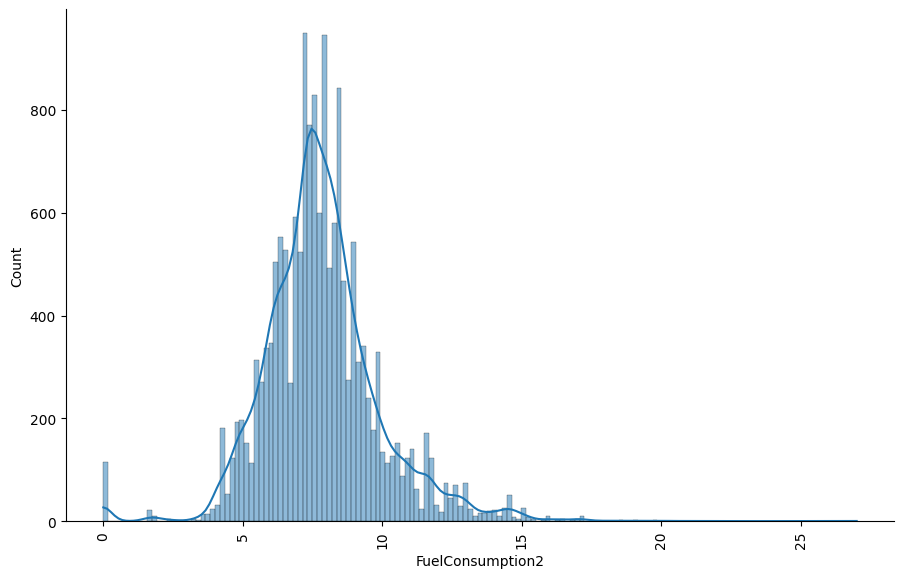

In [136]:
graf = sns.displot(df['FuelConsumption2'].sort_values(), kde=True)
graf.fig.set_size_inches(10, 6)
plt.xscale("linear")
plt.xticks(rotation=90)
plt.show()

### Cylinders in Engine Analysis


In [137]:
print(df.CylindersinEngine.unique())
print(df["CylindersinEngine"].value_counts())
print(df["CylindersinEngine"].isna().sum())

['4 cyl' '8 cyl' '-' '3 cyl' '6 cyl' '5 cyl' '12 cyl' '0 L' '2 cyl'
 '10 cyl' '2 L']
CylindersinEngine
4 cyl     11452
6 cyl      2082
-          1076
8 cyl       605
5 cyl       399
3 cyl       328
0 L         105
12 cyl       16
2 cyl         4
10 cyl        3
2 L           1
Name: count, dtype: int64
0


In [138]:
# Check "0 L"
print(df.loc[(df["CylindersinEngine"]=="0 L"),"FuelType"].value_counts())

FuelType
Electric    105
Name: count, dtype: int64


It is Assingned CylindersinEngine = 0, for Electrics.

In [139]:
df.loc[ df["FuelType"]=="Electric","CylindersinEngine"]= "0"
print(df.loc[(df["CylindersinEngine"]=="0"),"FuelType"].value_counts())

FuelType
Electric    115
Name: count, dtype: int64


The values "-" and "2 L" are wrong values. They represent 1380 data.

In [140]:
print(df.loc[(df["CylindersinEngine"]=="-"),"FuelType"].value_counts())

FuelType
Unleaded    437
Diesel      285
-           209
Premium     110
Other        24
LPG           1
Name: count, dtype: int64


These data will be replaced by the value of another car that has the same model.

In [141]:
# Dict, Model_Cyl :
df.CylindersinEngine = df.CylindersinEngine.str.replace(" cyl","")
df.CylindersinEngine = df.CylindersinEngine.str.replace(" L","")

df["CylindersinEngine"] = df["CylindersinEngine"].replace("-", np.nan)
df["CylindersinEngine"] = df["CylindersinEngine"].astype(float)
Model_Cyl = df[['Model',"CylindersinEngine"]].groupby('Model')["CylindersinEngine"].median()
Model_Cyl = Model_Cyl.to_dict()

df['CylindersinEngine2'] = df.apply(lambda row: Model_Cyl[row['Model']] if pd.isnull(row["CylindersinEngine"]) else row['CylindersinEngine'], axis=1)
print(df['CylindersinEngine2'].isna().sum())

0


In [142]:
check_Cyl = df[['CylindersinEngine','CylindersinEngine2',"Model","Brand"]]
check_Cyl.loc[pd.isnull(check_Cyl['CylindersinEngine'])]. sample(5, random_state=42)

,CylindersinEngine,CylindersinEngine2,Model,Brand
507,NaN,4.0,Hilux,Toyota
13863,NaN,4.0,Swift,Suzuki
6270,NaN,6.0,Rover,Land
16499,NaN,4.0,Estima,Toyota
13682,NaN,4.0,I30,Hyundai


In [143]:
df.drop('CylindersinEngine', axis=1,inplace=True)
df.columns

Index(['Brand', 'Year', 'Model', 'Transmission', 'DriveType', 'FuelType',
       'Kilometres', 'BodyType', 'Price', 'Doors2', 'Seats2', 'Status',
       'Engine_Vol2', 'FuelConsumption2', 'CylindersinEngine2'],
      dtype='object')

### Fuel Type Analysis

In [144]:
# Interpretacion de datos y reclasificacion.
print(df.FuelType.unique())

['Diesel' 'Premium' 'Unleaded' 'Hybrid' '-' 'Electric' 'Other' 'LPG'
 'Leaded']


In [145]:
df['FuelType'].value_counts()

FuelType
Unleaded    6734
Diesel      4815
Premium     3279
Hybrid       650
-            434
Electric     115
Other         25
LPG           15
Leaded         4
Name: count, dtype: int64

The feature will be simplified in Gasoline, Diesel, Hybrid, Electric.

In [146]:
df.loc[(df["FuelType"]=="Unleaded") | (df["FuelType"]=="Premium") | (df["FuelType"]=="Leaded") | (df["FuelType"]=="LPG"),"FuelType"]= "Gasoline"
print(df["FuelType"].value_counts())
plt.show()

FuelType
Gasoline    10032
Diesel       4815
Hybrid        650
-             434
Electric      115
Other          25
Name: count, dtype: int64


In [147]:
# Drop model vehicles that are only there once.
df = df.drop(df[df["Model"] == "Stagea"].index, axis=0) 
df = df.drop(df[df["Model"] == "Omoda5"].index, axis=0) 
df = df.drop(df[df["Model"] == 'XC70'].index, axis=0)
df = df.drop(df[df["Model"] == 'Caldina'].index, axis=0) 
df = df.drop(df[df["Model"] == 'Mazda3'].index, axis=0) 
df = df.drop(df[df["Model"] == 'ZR-V'].index, axis=0)

In [148]:
# Replacement of "-" or "Other" with information by model.
df["FuelType"] = df["FuelType"].replace("-", np.nan)
df["FuelType"] = df["FuelType"].replace("Other", np.nan)
Model_Cyl = df[['Model', 'FuelType']].groupby('Model')['FuelType'].apply(lambda x: x.mode())
Model_Cyl = Model_Cyl.to_dict()

df['FuelType2'] = df.apply(lambda row: Model_Cyl[row['Model'],0] if pd.isnull(row["FuelType"]) else row['FuelType'], axis=1)
print(df['FuelType2'].isna().sum())

0


In [149]:
df.drop('FuelType', axis = 1, inplace = True)

In [150]:
FuelType_dummies = pd.get_dummies(df.FuelType2,prefix="FuelType", dtype = int)

df = pd.concat([df, FuelType_dummies], axis=1)
df.drop('FuelType2', axis = 1, inplace = True)
df.columns

Index(['Brand', 'Year', 'Model', 'Transmission', 'DriveType', 'Kilometres',
       'BodyType', 'Price', 'Doors2', 'Seats2', 'Status', 'Engine_Vol2',
       'FuelConsumption2', 'CylindersinEngine2', 'FuelType_Diesel',
       'FuelType_Electric', 'FuelType_Gasoline', 'FuelType_Hybrid'],
      dtype='object')

### Drive Type Analysis

In [151]:
df.DriveType.unique()

array(['AWD', 'Front', 'Rear', 'Other', '4WD'], dtype=object)

In [152]:
df.DriveType.value_counts()

DriveType
Front    6845
4WD      3131
AWD      3096
Rear     2251
Other     729
Name: count, dtype: int64

In [153]:
print(df.loc[df["DriveType"]=="Other", ["Model",'Brand']].sample(10))

            Model       Brand
7549       Pajero  Mitsubishi
2475      Qashqai      Nissan
15537      Megane     Renault
16499      Estima      Toyota
8454          UTE         GWM
4358   Pathfinder      Nissan
362      Colorado      Holden
8307       Tiguan  Volkswagen
15552   Commodore      Holden
1041        HiAce      Toyota


In [154]:
df.DriveType.value_counts()

DriveType
Front    6845
4WD      3131
AWD      3096
Rear     2251
Other     729
Name: count, dtype: int64

It is applied Dummies for this feature

In [155]:
driveType_dummies = pd.get_dummies(df.DriveType,prefix="DriveType", dtype = int)
driveType_dummies

,DriveType_4WD,DriveType_AWD,DriveType_Front,DriveType_Other,DriveType_Rear
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,1,0,0
...,...,...,...,...,...
16727,0,0,1,0,0
16728,0,0,1,0,0
16731,0,0,1,0,0
16732,0,1,0,0,0


In [156]:
df = pd.concat([df, driveType_dummies], axis=1)
df.sample()

,Brand,Year,Model,Transmission,DriveType,Kilometres,BodyType,Price,Doors2,Seats2,...,CylindersinEngine2,FuelType_Diesel,FuelType_Electric,FuelType_Gasoline,FuelType_Hybrid,DriveType_4WD,DriveType_AWD,DriveType_Front,DriveType_Other,DriveType_Rear
15167,Ram,2023.0,1500,Automatic,4WD,- / -,Ute / Tray,127950.0,4,5,...,8.0,0,0,0,1,1,0,0,0,0


In [157]:
df.drop('DriveType', axis = 1, inplace = True)

In [158]:
df.columns.values

array(['Brand', 'Year', 'Model', 'Transmission', 'Kilometres', 'BodyType',
       'Price', 'Doors2', 'Seats2', 'Status', 'Engine_Vol2',
       'FuelConsumption2', 'CylindersinEngine2', 'FuelType_Diesel',
       'FuelType_Electric', 'FuelType_Gasoline', 'FuelType_Hybrid',
       'DriveType_4WD', 'DriveType_AWD', 'DriveType_Front',
       'DriveType_Other', 'DriveType_Rear'], dtype=object)

### Transmission Analysis

In [159]:
df.Transmission.value_counts()

Transmission
Automatic    14019
Manual        1893
-              140
Name: count, dtype: int64

"-" Will be replaced by most common value(median).

In [160]:
df.loc[df["Transmission"]=="-","Transmission"] = "Automatic"
df.Transmission.value_counts()

Transmission
Automatic    14159
Manual        1893
Name: count, dtype: int64

In [161]:
transmission_dict = {
    'Manual' : 0,
    'Automatic' : 1
}

transmission_bin = df.Transmission.replace(transmission_dict)
transmission_bin

0        1
1        1
2        1
3        1
4        1
        ..
16727    1
16728    1
16731    1
16732    1
16733    1
Name: Transmission, Length: 16052, dtype: int64

In [162]:
df['Transmission_bin'] = transmission_bin
df.sample()

,Brand,Year,Model,Transmission,Kilometres,BodyType,Price,Doors2,Seats2,Status,...,FuelType_Diesel,FuelType_Electric,FuelType_Gasoline,FuelType_Hybrid,DriveType_4WD,DriveType_AWD,DriveType_Front,DriveType_Other,DriveType_Rear,Transmission_bin
3445,Audi,2019.0,RS5,Automatic,12388,Hatchback,121950.0,5,4,1,...,0,0,1,0,0,1,0,0,0,1


In [163]:
df.drop('Transmission', axis=1, inplace = True)

In [164]:
df.sample()

,Brand,Year,Model,Kilometres,BodyType,Price,Doors2,Seats2,Status,Engine_Vol2,...,FuelType_Diesel,FuelType_Electric,FuelType_Gasoline,FuelType_Hybrid,DriveType_4WD,DriveType_AWD,DriveType_Front,DriveType_Other,DriveType_Rear,Transmission_bin
6156,Subaru,2008.0,Forester,218764,SUV,11490.0,4,5,1,2.5,...,0,0,1,0,0,1,0,0,0,1


### Brand Analysis

To start will be applied Dummies to this feature. After, in model evaluation will be check if is necessary.

In [165]:
df.Brand.isna().sum()

0

In [169]:
print(f"Number of Brands: {df.Brand.nunique()}")
marcas = df.Brand.value_counts()
marcas_repetidos_menos_de_10 = marcas[marcas > 100]
print(f"Brands that there are more than 100 times: {marcas_repetidos_menos_de_10.shape[0]}")
print(f"Number of vehicles of these Brands: {marcas_repetidos_menos_de_10.sum()}")

Number of Brands: 70
Brands that there are more than 100 times: 25
Number of vehicles of these Brands: 15298


In [170]:
Brand_dummies = pd.get_dummies(df['Brand'],prefix="Brand" ,dtype=int)
Brand_dummies.sample(1)

,Brand_Abarth,Brand_Alfa,Brand_Aston,Brand_Audi,Brand_BMW,Brand_BYD,Brand_Bentley,Brand_Caterham,Brand_Chery,Brand_Chevrolet,...,Brand_Skoda,Brand_Smart,Brand_Ssangyong,Brand_Subaru,Brand_Suzuki,Brand_Tata,Brand_Tesla,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
13995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [171]:
df = pd.concat([df, Brand_dummies], axis=1)

In [115]:
#df.drop('Brand', axis = 1, inplace = True)

### Model Analysis

In [172]:
df.Model.nunique()

686

In [173]:
df.Model.value_counts()

Model
Hilux          430
Ranger         398
Corolla        395
Landcruiser    367
I30            363
              ... 
LX600            1
S450L            1
330CI            1
Cabrio           1
190              1
Name: count, Length: 686, dtype: int64

It is evaluated how many model vehicles are more than 50 times.

In [174]:
model_list = df['Model'].value_counts()
humbral = 50
print(f"The car models that appear more than 50 times are:: {model_list[model_list >= humbral]. shape[0]}")
print(f"The number of cars of these models are: {model_list[model_list >= humbral].sum()}")

The car models that appear more than 50 times are:: 84
The number of cars of these models are: 11425


To begin with, the model will be modified by dummies. Then we will check if it works to continue maintaining all this information.

In [175]:
Model_dummies = pd.get_dummies(df['Model'],prefix="Model" ,dtype=int)
Model_dummies.sample(1)
df = pd.concat([df, Model_dummies], axis=1)

### Body Type Analysis

In [176]:
df.BodyType.nunique()

9

In [177]:
df.BodyType.unique()

array(['SUV', 'Hatchback', 'Coupe', 'Commercial', 'Wagon', 'Ute / Tray',
       'Sedan', 'Convertible', 'Other'], dtype=object)

In [178]:
df.shape

(16052, 778)

In [125]:
#df.DriveType = df.BodyType.str.replace('Other', 'BodyType_Other')

In [179]:
body_dummies = pd.get_dummies(df.BodyType,prefix="BodyType"  , dtype=int)
df = pd.concat([df, body_dummies], axis=1)
df.sample()

,Brand,Year,Model,Kilometres,BodyType,Price,Doors2,Seats2,Status,Engine_Vol2,...,Model_ZST,BodyType_Commercial,BodyType_Convertible,BodyType_Coupe,BodyType_Hatchback,BodyType_Other,BodyType_SUV,BodyType_Sedan,BodyType_Ute / Tray,BodyType_Wagon
9053,Jeep,2006.0,Grand,211770,SUV,8999.0,4,5,1,3.0,...,0,0,0,0,0,0,1,0,0,0


In [180]:
df.shape

(16052, 787)

In [181]:
df.drop('BodyType', axis = 1, inplace = True)

### Kilometres Analysis

In [182]:
print(df["Kilometres"].value_counts())

Kilometres
- / -     440
10        124
-         105
15         92
20         77
         ... 
72096       1
13467       1
996         1
178126      1
31852       1
Name: count, Length: 13784, dtype: int64


In [183]:
print(stat_dict)
print(df["Status"].value_counts())
# 1= USED   0= DEMO   2= NEW

{'DEMO': 2, 'USED': 1, 'NEW': 3}
Status
1    14424
3     1146
2      482
Name: count, dtype: int64


In [184]:
# Check STATUS of "-".
# There are 564 vehicles con "-" in Kilometres.
print(df.loc[df["Kilometres"]=="- / -"].Status.value_counts())
print(df.loc[df["Kilometres"]=="-"].Status.value_counts())

Status
3    440
Name: count, dtype: int64
Status
3    96
1     7
2     2
Name: count, dtype: int64


The NEW vehicles will have 0 km.

In [185]:
df.loc[(df["Kilometres"]=="- / -") | (df["Kilometres"]=="-"), "Kilometres"] = 0
print(df["Kilometres"].value_counts())

Kilometres
0         545
10        124
15         92
20         77
7          58
         ... 
72096       1
13467       1
996         1
178126      1
31852       1
Name: count, Length: 13783, dtype: int64


# EDA

## Graphs

In [186]:
print(len(df.columns))

786


### Relation features-Price

In [187]:
print(df.shape)

(16052, 786)


In [188]:
df["Year"] = df["Year"].astype(int)
df["FuelConsumption2"] = df["FuelConsumption2"].astype(float)
df["Kilometres"] = df["Kilometres"].astype(int)
df["Doors2"] = df["Doors2"].astype(int)
df["Seats2"] = df["Seats2"].astype(int)

<Axes: >

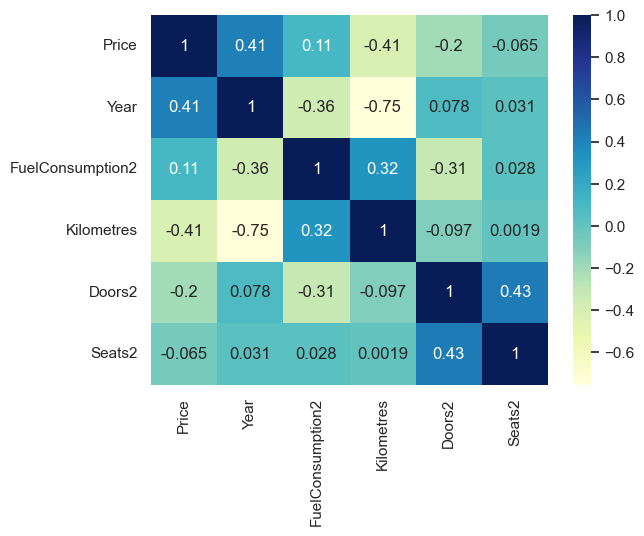

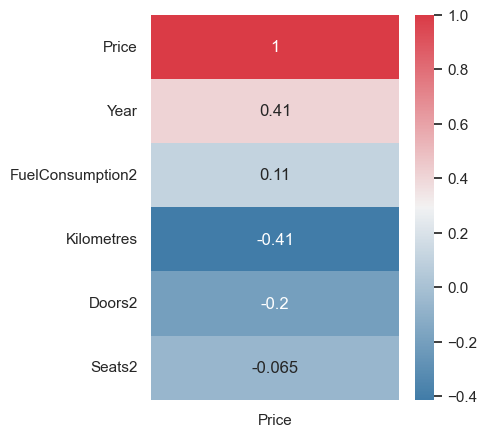

In [189]:
# Correlation by precio.
HM = df[["Price","Year","FuelConsumption2","Kilometres","Doors2","Seats2"]]
HM = HM.corr()
sns.set(style="whitegrid")
plot1 = sns.heatmap(HM, annot=True, cmap="YlGnBu")

HM2 = HM.loc['Price' , :]
HM2 = pd.DataFrame(HM2)
plt.figure(figsize=(4,5))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(HM2, annot=True, cmap=cmap)

### Distribution of the price by the Year

Goal:
  - Identify the limit of year for this dataset.
  - Identify outliers.

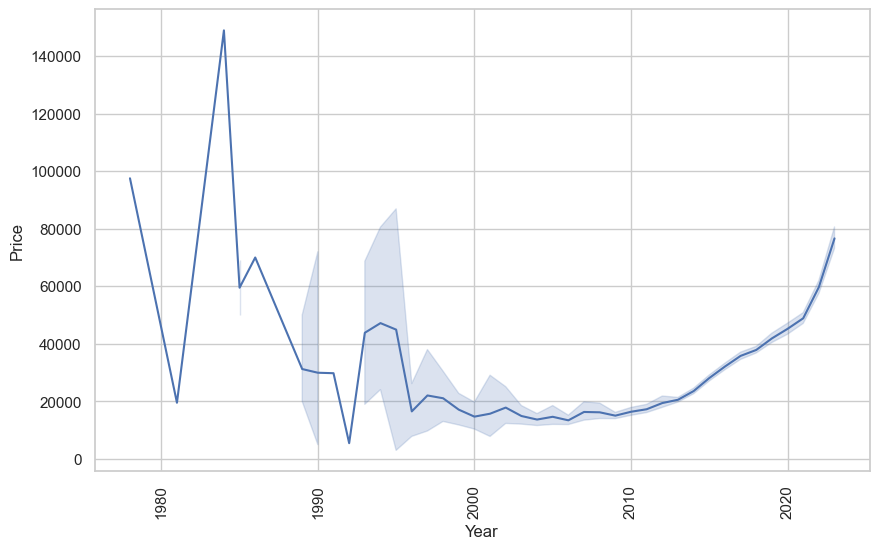

In [190]:
plt.figure(figsize=(10, 6))
plot= sns.lineplot(x=df["Year"], y=df["Price"])
plt.xscale("linear")
plt.xticks(rotation=90)
plt.show()


In [192]:
# Highest prices:
print(df[["Year",'Brand','Model',"Price"]].sort_values("Price",ascending=False))

       Year          Brand      Model     Price
3357   2019        McLaren       720S  649880.0
10358  2012    Lamborghini  Aventador  649880.0
15116  2023        Ferrari        812  610000.0
5271   2019        Ferrari       GTC4  579888.0
15295  2023        Bentley   Mulsanne  553600.0
...     ...            ...        ...       ...
1747   2008       Chrysler    Sebring    1895.0
4862   2002  Mercedes-Benz      MB100    1895.0
13203  2004          Mazda          6    1200.0
12460  1998         Daewoo      Lanos     900.0
15831  2006           Alfa      Romeo      88.0

[16052 rows x 4 columns]


### Price Outliers

IQR analysis for finding outliers

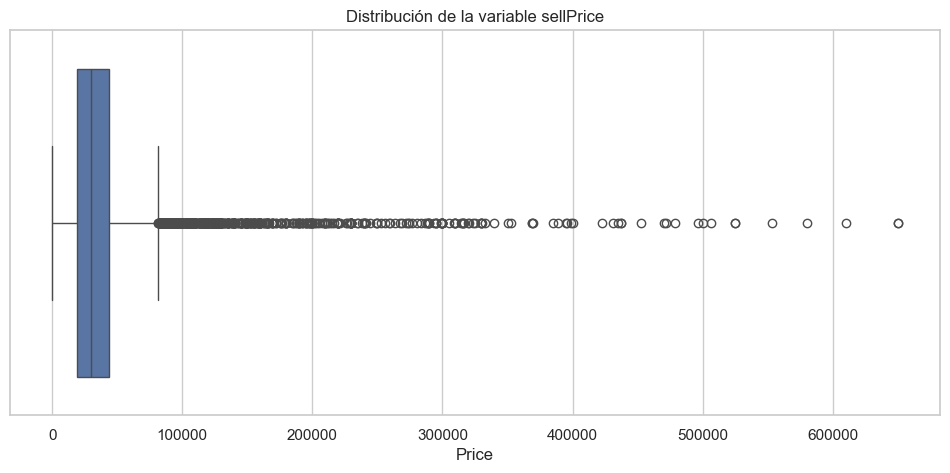

In [193]:
# IQR Filter
Q1 = df.Price.quantile(0.25)
Q3 = df.Price.quantile(0.75)
IQR = Q3- Q1
max = Q3 + 1.5*IQR
min = Q1 - 1.5*IQR


fig = plt.figure(figsize = (12,5))
ax = plt.axes()
ax = sns.boxplot(x=df.Price)
ax.set_title("Distribución de la variable sellPrice")
plt.show()

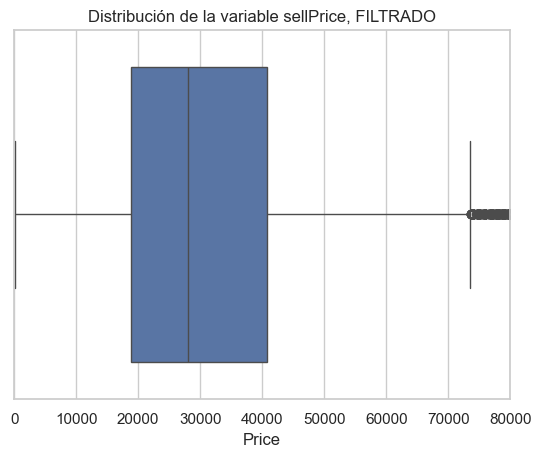

In [194]:
filtered_data = df['Price'][(df['Price'] >= min) & (df['Price'] <= max)]
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=filtered_data)
plt.xlim(0, 80000)
ax.set_title("Distribución de la variable sellPrice, FILTRADO")
plt.show()

In [197]:
# The BoxPlot, shows that vehicles with a price over 72.500 AUD are considered Outliers.

df_price_high= df.loc[df["Price"]>72500]
print(f"The number of vehicles > 72,500 AUD is: {df_price_high.shape[0]}")
print(f"Are  {round(df_price_high.shape[0] / df.shape[0] *100,2)}% of all data")

The number of vehicles > 72,500 AUD is: 1181
Are  7.36% of all data


At begin I will drop this vehicles

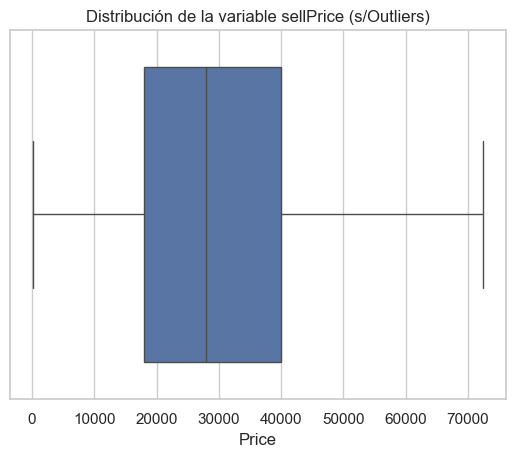

In [198]:
# Outliers delete.
df = df[df["Price"]<= 72500]

# BoxPlot
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df.Price)
ax.set_title("Distribución de la variable sellPrice (s/Outliers)")
plt.show()

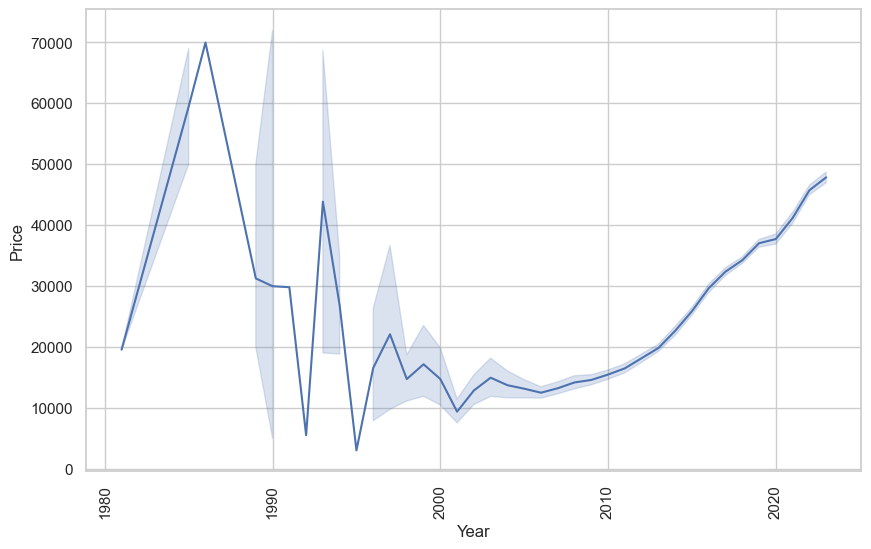

In [199]:
# Lineplot Year/Price. Without outliers:

plt.figure(figsize=(10, 6))
plot= sns.lineplot(x=df["Year"], y=df["Price"])
plt.xscale("linear")
plt.xticks(rotation=90)
plt.show()

From this graph I will analyze the number of cars by year. 

I don't see a smooth curve until after the year 2000.

(14871, 786)
Vehicles manufactured before the year 2000 are: 82
Vehicles manufactured during and after the year 2000 are: 14789


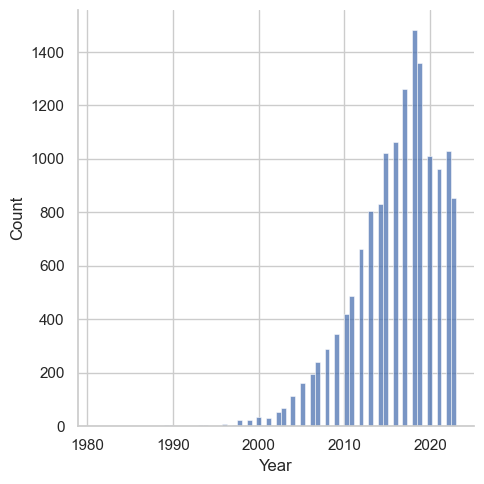

In [201]:
# Dimensions of Dataset:
print(df.shape)

# Number of Vehicles >2000 y <2000.
df_old = df[df["Year"] < 2000]
df_new = df[df["Year"] >= 2000]
print(f"Vehicles manufactured before the year 2000 are: {df_old.shape[0]}")
print(f"Vehicles manufactured during and after the year 2000 are: {df_new.shape[0]}")

plot= sns.displot(df["Year"])
plt.show()

Vehicles developed before of year 2000 will be dropped. There are few amount of data, and could be considered vehicles of "collection". 
Equally, this decision will be evaluated by the results of the model.

In [202]:
df = df[df["Year"]> 2000]

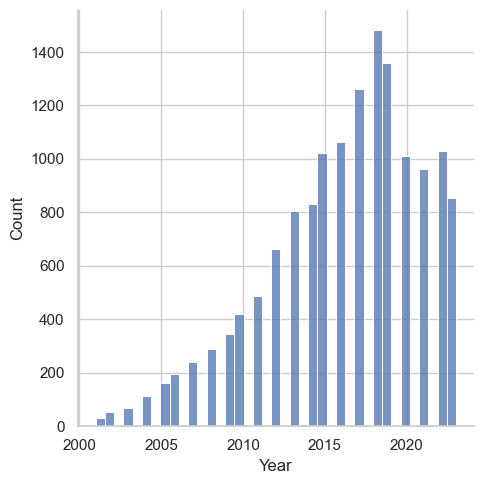

In [203]:
plot= sns.displot(df["Year"])
plt.show()

# Model Development

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In this section I will design differents models with the goal to find which fits better in this problem. 

The models developed are:

* Random Forest
* XgBoost
* Stacking
* ANN

## RandomForestRegressor-1

Drop the original columns of Brand and Model that now are in dummies. 

In [215]:
X = df.drop(['Price','Brand','Model'], axis=1)
y= df['Price']

print(X.shape, y.shape)

(14753, 783) (14753,)


In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [217]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
# Transforma los datos de validación y test

X_test= scaler.transform(X_test)

In [218]:
RF = RandomForestRegressor(n_jobs=-1 , random_state=42,min_samples_split=2 )

param_grid = {
    'n_estimators': [100], 
    'max_depth': [25]
}

GS_RF = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5 , scoring='neg_mean_absolute_error')
GS_RF.fit(X_train, y_train)
print("Mejores hiperparámetros:", GS_RF.best_params_)

Mejores hiperparámetros: {'max_depth': 25, 'n_estimators': 100}


In [219]:
y_pred_train = GS_RF.predict(X_train)
y_pred_test = GS_RF.predict(X_test)

test_score = mean_absolute_error(y_test,y_pred_test)
train_score = mean_absolute_error(y_train,y_pred_train)

print(f"El MAE en test es: {test_score}")
print(f"El MAE en train es: {train_score}")

El MAE en test es: 3469.543728284557
El MAE en train es: 1413.607963835889


## RandomForestRegressor- 2

Random Forest-1 uses all the features. In RF-2 I will check the result using only the most important features. 

In [214]:
RF_Best = GS_RF.best_estimator_
F_names = X_train.columns
F_Importance = RF_Best.feature_importances_

# Generate a DF with the importance of every feature:
F_Importance_df = pd.DataFrame({'Feature': F_names, 'Importance': F_Importance})
F_Importance_df = F_Importance_df.sort_values(by='Importance', ascending=False)
print(F_Importance_df)

#F_Importance_df.to_csv('Feature_importances.csv')

              Feature  Importance
0                Year    0.450497
1          Kilometres    0.131892
14    DriveType_Front    0.092716
5         Engine_Vol2    0.083926
6    FuelConsumption2    0.041060
..                ...         ...
656       Model_S450L    0.000000
27    Brand_Chevrolet    0.000000
416       Model_GLE43    0.000000
659         Model_S63    0.000000
660         Model_S65    0.000000

[783 rows x 2 columns]


Select the 50 most important features by RF. Retrain the model to check results.

In [220]:
most_important_features = (F_Importance_df["Feature"].head(50))
X_imp_features = X[most_important_features]
print(X_imp_features.shape[1])

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_imp_features, y, test_size=0.2, random_state=42)
print(X_train2.shape)
print(X_test2.shape)

50
(11802, 50)
(2951, 50)


In [221]:
RF2 = RandomForestRegressor(n_jobs=-1 , random_state=42, min_samples_split=2 )

param_grid = {
    'n_estimators': [100], 
    'max_depth': [15]
}

GS_RF2 = GridSearchCV(estimator=RF2, param_grid=param_grid, cv=5 , scoring='neg_mean_absolute_error')
GS_RF2.fit(X_train2, y_train2)
print("Mejores hiperparámetros:", GS_RF2.best_params_)

y_pred_train = GS_RF2.predict(X_train2)
y_pred_test = GS_RF2.predict(X_test2)

test_score = mean_absolute_error(y_test2,y_pred_test)
train_score = mean_absolute_error(y_train2,y_pred_train)

print(f"El MAE en test es: {test_score}")
print(f"El MAE en train es: {train_score}")

Mejores hiperparámetros: {'max_depth': 15, 'n_estimators': 100}
El MAE en test es: 3807.86828690247
El MAE en train es: 2220.1874422949118


The result is worst than RF-1

## XGBOOST

In [222]:
import xgboost 
XGB = xgboost.XGBRegressor(
    n_estimators = 200,
    eta = 0.3,
    max_depth = 6,
    subsample = 0.7,
    reg_lambda = 1, #L2 Ridge
    reg_alpha = 0, #L1 Lasso 
)

XGB.fit (X_train,y_train)
y_pred_test_XGB = XGB.predict(X_test)
y_pred_train_XGB = XGB.predict(X_train)

print(f"El MAE en el set de test es de: {mean_absolute_error(y_pred_test_XGB,y_test)}")
print(f"El MAE en el set de test es de: {mean_absolute_error(y_pred_train_XGB,y_train)}")

El MAE en el set de test es de: 3212.9031019840995
El MAE en el set de test es de: 2219.3658804726224


### Graph of XGBoost

#### MAE VS Max_Depth

Draw a plot about relation between max_depth / MAE

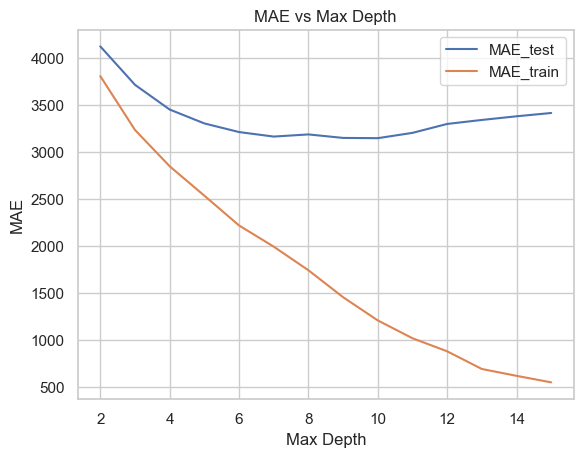

In [223]:
MAE_test = []
MAE_train = []
for i in [2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    XGB = xgboost.XGBRegressor(
    n_estimators = 200,
    eta = 0.3,
    max_depth = i,
    subsample = 0.7,
    reg_lambda = 1, #L2 Ridge
    reg_alpha = 0, #L1 Lasso 
    )
    XGB.fit (X_train,y_train)
    y_pred_test_XGB = XGB.predict(X_test)
    y_pred_train_XGB = XGB.predict(X_train)
    MAE_test.append(mean_absolute_error(y_pred_test_XGB,y_test))
    MAE_train.append(mean_absolute_error(y_pred_train_XGB,y_train))

data = pd.DataFrame({
    'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'MAE_test': MAE_test,
    'MAE_train': MAE_train
})

sns.lineplot(data=data, x='max_depth', y='MAE_test', label='MAE_test')
sns.lineplot(data=data, x='max_depth', y='MAE_train', label='MAE_train')
plt.xlabel('Max Depth')
plt.ylabel('MAE')
plt.title('MAE vs Max Depth')
plt.show()

## STACKING

In [225]:
from sklearn.ensemble import StackingRegressor
"""
estimators = [
    ("RF", RandomForestRegressor(n_estimators=100, max_depth=25, random_state=42)),
    ("XGB", XGB)
]

STK = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10, max_depth=10 ,random_state=42))

STK.fit (X_train,y_train)
y_pred_test_STK = STK.predict(X_test)
y_pred_train_STK = STK.predict(X_train)

print(f"MAE test set is: {mean_absolute_error(y_pred_test_STK,y_test)}")
print(f"MAE train set is: {mean_absolute_error(y_pred_train_STK,y_train)}")
"""

'\nestimators = [\n    ("RF", RandomForestRegressor(n_estimators=100, max_depth=25, random_state=42)),\n    ("XGB", XGB)\n]\n\nSTK = StackingRegressor(\n    estimators=estimators,\n    final_estimator=RandomForestRegressor(n_estimators=10, max_depth=10 ,random_state=42))\n\nSTK.fit (X_train,y_train)\ny_pred_test_STK = STK.predict(X_test)\ny_pred_train_STK = STK.predict(X_train)\n\nprint(f"MAE test set is: {mean_absolute_error(y_pred_test_STK,y_test)}")\nprint(f"MAE train set is: {mean_absolute_error(y_pred_train_STK,y_train)}")\n'

# ANN

In [226]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

## Creacion de Train, Val, Test Set

In [227]:
# Creacion de Train Set, Valid Set y Test Set. 70,15,15.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Luego, dividimos el temp set en validation set y test set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

(10327, 783) (2213, 783) (2213, 783)


## Standard Scaler

In [228]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
# Transforma los datos de validación y test
X_val= scaler.transform(X_val)
X_test= scaler.transform(X_test)

In [229]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_val = pd.DataFrame(X_val, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [230]:
X_train

,Year,Kilometres,Doors2,Seats2,Status,Engine_Vol2,FuelConsumption2,CylindersinEngine2,FuelType_Diesel,FuelType_Electric,...,Model_ZST,BodyType_Commercial,BodyType_Convertible,BodyType_Coupe,BodyType_Hatchback,BodyType_Other,BodyType_SUV,BodyType_Sedan,BodyType_Ute / Tray,BodyType_Wagon
0,0.545455,0.225556,1.000000,0.428571,0.0,0.312500,0.277487,0.4,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.454545,0.450391,0.666667,0.714286,0.0,0.421875,0.460733,0.6,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.727273,0.368799,0.666667,0.142857,0.0,0.390625,0.460733,0.4,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.818182,0.060019,0.666667,0.428571,0.0,0.515625,0.534031,0.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.772727,0.068283,0.666667,0.714286,0.0,0.437500,0.450262,0.4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10322,0.727273,0.379963,0.666667,0.857143,0.0,0.515625,0.607330,0.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10323,0.545455,0.172511,0.666667,0.428571,0.0,0.562500,0.497382,0.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10324,0.727273,0.157187,0.666667,0.428571,0.0,0.187500,0.287958,0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10325,0.772727,0.255806,0.666667,0.428571,0.0,0.390625,0.382199,0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Model

Minimum validation loss: 3007.325439453125 at epoch 99


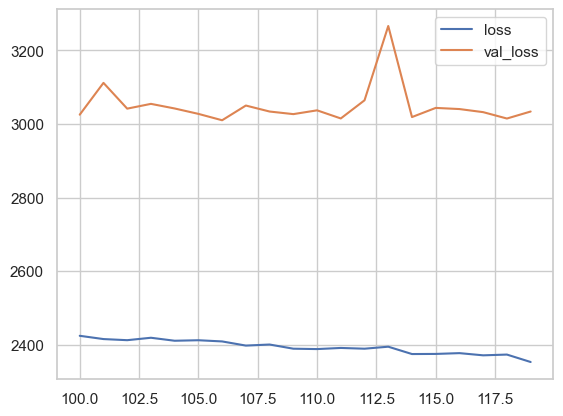

In [231]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(150, activation='relu', input_shape=[783]),
    layers.Dense(150, activation='relu'),
    layers.Dense(150, activation='relu'),
    layers.Dense(150, activation='relu'),
    layers.Dense(150, activation='relu'),
    layers.Dense(1, activation='linear'),
])
model.compile(
    optimizer='nadam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[100:, ['loss', 'val_loss']].plot()
min_val_loss = history_df['val_loss'].min()
min_val_loss_epoch = history_df[history_df['val_loss'] == min_val_loss].index[0]
print("Minimum validation loss: {} at epoch {}".format(min_val_loss, min_val_loss_epoch))


In [234]:
# Evaluación del modelo
y_pred_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

y_pred_train = model.predict(X_train)
mae_train = mean_absolute_error(y_pred_train,y_train) 

print("Mean Absolute Error Test:", mae_test)
print("Mean Absolute Error Train:", mae_train)

323/323 [==============================] - 0s 1ms/step
Mean Absolute Error Test: 3161.079837955935
Mean Absolute Error Train: 2330.670740468326


In [235]:
df['Price'].describe()

count    14753.000000
mean     30312.803769
std      15308.954317
min         88.000000
25%      18745.000000
50%      27990.000000
75%      39990.000000
max      72490.000000
Name: Price, dtype: float64

In [236]:
# Relative Error by mean price. 
mean_price = df['Price'].mean()
error_porc = mae_test * 100/ mean_price
print(f"Percentage error based on the mean: {round(error_porc,2)}")

Error porcentual en base a la media: 10.43


# Conclusion

Best model: ANN, MAE test of  3160 AUD.

* The dataset was to dirty and it was the biggest job in this project. The criterio for data cleaning was the most important skill. This dataset is a perfect example of a Real Dataset. 

* The EDA were very important because from that I took the most important decision about what to include in the train and what to exclude. 

* The different knowledge in every kind of model makes me reach a very good performance in all the models. Finally I choosed the ANN because were the mos accurate. 

Finally,  I am pleased with the results achieved in this machine learning project, especially considering the challenges presented by the dataset and the various decisions that needed to be made along the way. This project has not only produced promising outcomes but has also provided valuable insights into the significance of meticulous data analysis and decision-making. It underscores the importance of careful consideration and examination of every aspect of the provided data. Moving forward, the knowledge and experience gained from this project will undoubtedly serve as a solid foundation for future pursuits in the field of machine learning.